## Data Source

Foreign donation data source: https://catalog.data.gov/dataset/foreign-gifts-and-contracts-report-2011

Data description from source:

>"The Foreign Gift and Contracts Report contains all gifts received within the previous six years from any foreign source, contracts with a foreign entity, and/or any ownership interests in or control over the institution by a foreign entity reported by Title IV-eligible domestic institutions that offer a bachelor's degree or higher, or that offer a transfer program of not less than two years that is acceptable for credit toward a bachelor's degree, when the total value of all gifts given in a calendar year is $250,000 or greater or if the institution is owned or controlled by a foreign source."

Data last updated: August 9, 2018

**Note**: All recorded donations dated back 6 years, _i.e._ 2012-2018.

### Initial loading of foreign gifts data from data.gov

In [174]:
import pandas as pd

donations_df = pd.read_excel('./data/ForeignGifts.xls', skiprows=1)
# donations_df.loc[:, 'Foreign Gift Amount'] = donations_df.loc[:, 'Foreign Gift Amount'].apply('{:,}'.format)
donations_df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,324200,Carnegie Mellon University,Pittsburgh,PA,2015-01-01,77391377,Contract,QATAR,Qatar Foundation for Education
1,2,143400,American University (The),Washington,DC,2012-01-25,500000,Monetary Gift,BAHRAIN,Kingdom of Bahrain
2,3,143400,American University (The),Washington,DC,2013-05-28,500000,Monetary Gift,BAHRAIN,Sheikh Salman Bin Al-Khalifa
3,4,143400,American University (The),Washington,DC,2015-09-10,500000,Monetary Gift,KUWAIT,NaN
4,5,143400,American University (The),Washington,DC,2012-05-17,610000,Monetary Gift,ENGLAND,NaN


## Universities receiving foreign donations  
### Top 10 Universities based on number of foreign donations received

In [3]:
(donations_df
 .groupby('Institution Name')   # Grouping by unisveristy
 .count()                       # Applying count() to group
 .iloc[:, 0]                    # Only display first column
 .sort_values(ascending=False)  # Sort in decending order
 .head(10))                     # Only show top 10

Institution Name
University of California, Los Angeles          3611
California Institute of Technology             3364
Johns Hopkins University                       1181
Columbia University in the City of New York     828
Ohio State University (The)                     795
University of Michigan - Ann Arbor              702
Stanford University                             659
Harvard University                              564
Massachusetts Institute of Technology           415
University of Colorado Denver                   412
Name: ID, dtype: int64

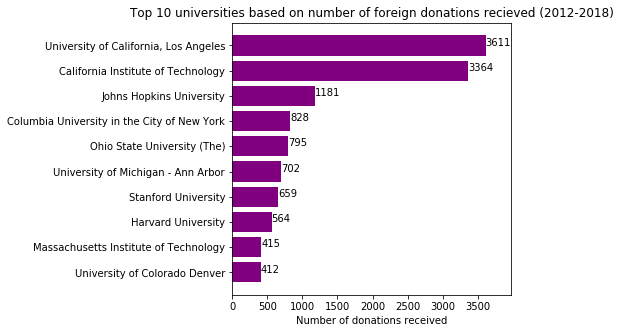

In [4]:
import matplotlib.pyplot as plt

top10_by_counts = (
    donations_df.groupby('Institution Name')
    .count()
    .iloc[:, 0]
    .sort_values(ascending=True)
    .iloc[-10:])

fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(top10_by_counts.index, top10_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations received')
ax.set_title('Top 10 universities based on number of foreign donations recieved (2012-2018)')
for i, v in enumerate(top10_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

### Top 10 schools based on total dollars of foreign donations received

In [5]:
(donations_df
 .groupby('Institution Name')     # Group by university
 .sum()                           # Apply sum() to all columns
 .loc[:, 'Foreign Gift Amount']   # Only display 'Foresign Gift Amount' columm
 .sort_values(ascending=False)    # Sort in decending
 .head(10))                        # Display top 10 entries only

Institution Name
Carnegie Mellon University               1378003807
Harvard University                       1143899998
Massachusetts Institute of Technology     660830374
Johns Hopkins University                  447459034
Northwestern University                   420550173
Georgetown University                     415622195
University of California, Berkeley        336801721
Duke University                           314693237
Stanford University                       313775195
New York University                       291391003
Name: Foreign Gift Amount, dtype: int64

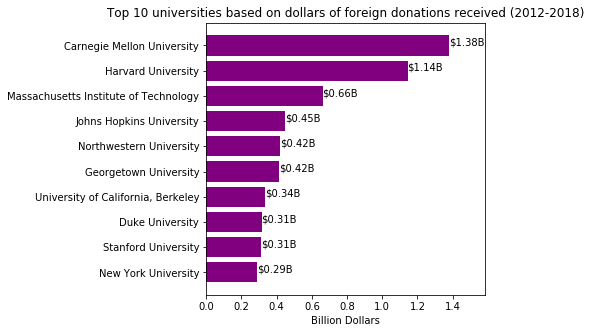

In [6]:
top10_by_dollars = (donations_df
    .groupby('Institution Name')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=True)
    .iloc[-10:])

fig, ax = plt.subplots(figsize=(5,5))                                  # Initialize pyplot area
ax.barh(top10_by_dollars.index, top10_by_dollars.values*(10**-9), color='purple')   # Generating bar chart
ax.set_xlabel('Billion Dollars')
ax.set_title('Top 10 universities based on dollars of foreign donations received (2012-2018)')
for i, v in enumerate(top10_by_dollars):
    ax.text(v*(10**-9), i,'\$'+str('{:.2f}'.format(v*(10**-9))+'B'), color='black')
plt.margins(x=0.15)

### Top 10 schools based on total dollars of foreign donations received (cash only)

In [7]:
(donations_df
 .loc[donations_df['Gift Type']=='Monetary Gift']  # Pullinng all rows that are 'Monetary Gift' only (at 'Gift Type' column)
 .groupby('Institution Name')                      # Group by university
 .sum()                                            # Apply sum() over columns
 .loc[:, 'Foreign Gift Amount']                    # Only display 'Foreign Gift Amount column'
 .sort_values(ascending=False)                     # Sort in descending order
 .head(10))                                        # Display top 10 entries only

Institution Name
Harvard University                             729378154
Massachusetts Institute of Technology          582888432
Johns Hopkins University                       447443471
Stanford University                            305730258
Duke University                                242147330
Columbia University in the City of New York    146003397
New York University                            140389153
University of Pennsylvania                     135399121
University of California, Berkeley             132745273
Yale University                                112274698
Name: Foreign Gift Amount, dtype: int64

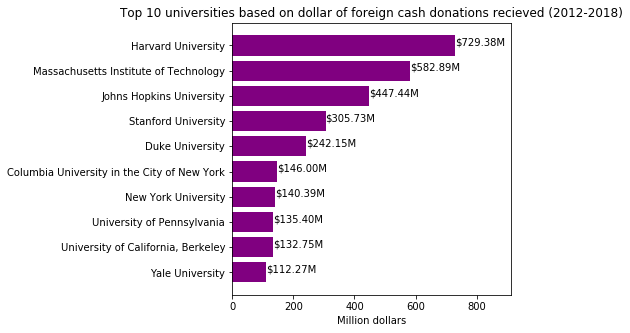

In [71]:
top10_by_cash = (donations_df.loc[donations_df['Gift Type']=='Monetary Gift']
 .groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=True)
 .iloc[-10:])

fig, ax = plt.subplots(figsize=(5,5))                                   # Initializing pyplot area
ax.barh(top10_by_cash.index, top10_by_cash.values*(10**-6), color='purple')    # Generating bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Top 10 universities based on dollar of foreign cash donations recieved (2012-2018)')
for i, v in enumerate(top10_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)
# Note: this is donated contract + cash gifts

## Data Source

Democracy Index data scrapped from: https://en.wikipedia.org/wiki/Democracy_Index, original data from: https://www.eiu.com/public/topical_report.aspx?campaignid=democracyindex2019

Democracy Index description from source: 
>"The EIU Democracy Index provides a snapshot of the state of world democracy for 165 independent states and two territories. The Democracy Index is based on five categories: electoral process and pluralism; civil liberties; the functioning of government; political participation; and political culture. Based on their scores on 60 indicators within these categories, each country is then itself classified as one of four types of regime: full democracy; flawed democracy; hybrid regime; and authoritarian regime."

**Note**: Full Democracy Index report available on repository

### Initial loading of Democracy Index data

**Note**: Data scrapped from Wikipedia, which cited the [EIU](https://www.eiu.com/topic/democracy-index), via the MS Excel "data from web" function.

In [176]:
labels = [                                    # List of column headings for democracy index data
    'Rank',
    'Country',
    'Score',
    'Electoral process and pluralism',
    'Functioning of government',
    'Political participation',
    'Political culture',
    'Civil liberties',
    'Regime type',
    'Region',
    '','','','','']                          # Empty labels needed because of the shape of the data file
democracy_df = pd.read_excel(
    './data/democracy_index.xlsx',
    names=labels,                            # Use list generated above for column labels
    skiprows=148)                            # Number of rows to skip determined by brute force trail and error

democracy_df.drop(
    ['', '.1', '.2', '.3', '.4'],            # Dropping empty columns        
    axis=1,
    inplace=True)
democracy_df = democracy_df.iloc[2:310]      # Dropping superfluous columns to the left
democracy_df.loc[:, 'Country'] = (
    democracy_df.loc[:, 'Country']           # There were extra whitespace to the left of the name of countries 
    .str                                     # Accessing string methods
    .strip())                                # Strip white space on both side
democracy_df = (                             
    democracy_df.loc[democracy_df['Country'] # Slicing out all empty rows
    .isnull() == False])                     # Identifying empty rows by empty cells in 'Country' column    
democracy_df.fillna(                         # Fill in missing rankings
    method='ffill',
    inplace=True)
democracy_df.set_index('Country', inplace=True)
democracy_df.rename(                         # Rename the one country name with superscript notes
    index={'South Korea[n 2]': 'South Korea'},
    inplace=True)
democracy_df.head()

,Rank,Score,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,Regime type,Region
Country,,,,,,,,,
Norway,1,9.87,10.00,9.64,10.00,10.00,9.71,Full democracy,Western Europe
Iceland,2,9.58,10.00,9.29,8.89,10.00,9.71,Full democracy,Western Europe
Sweden,3,9.39,9.58,9.64,8.33,10.00,9.41,Full democracy,Western Europe
New Zealand,4,9.26,10.00,9.29,8.89,8.13,10.00,Full democracy,Asia & Australasia
Finland,5,9.25,10.00,8.93,8.89,8.75,9.71,Full democracy,Western Europe


### Democracy Index data clean-up and merger with donation dataset

In [10]:
# Pulling all unique foreign nations that made a donation to US universities

donation_countries = set(donations_df
                         .loc[:, 'Country of Giftor']
                         .str
                         .title())                      # Transform name of countries to title case

In [11]:
# Pulling all countries with a democracy rating

democracy_countries = set(democracy_df.index)

In [12]:
# Find countries that donated that does not appear in democracy index

intersect = donation_countries & democracy_countries  # Set intersection
donation_countries - intersect

{'Bahamas',
 'Barbados',
 'Bermuda',
 'Bosnia And Herzegovina',
 'Bosnia-Hercegovina',
 'British West Indies',
 'Burma',
 'Cayman Islands (The)',
 'Ceylon',
 'Curaçao',
 'England',
 'Grenada',
 'Guam',
 'Guernsey',
 'Isle Of Man',
 'Jersey',
 'Korea',
 'Liechtenstein',
 'Marshal Islands (The)',
 'Monaco',
 'Palestine, State Of',
 'Puerto Rico',
 'Scotland',
 'St. Lucia',
 'Swaziland',
 'Syrian Arab Republic',
 'The Netherlands',
 'Tokelau',
 'Trinidad',
 'United Nations',
 'Usa',
 'Virgin Islands (British)',
 'Wales'}

In [13]:
# Construct rename dictionary to correlate country names between the two datasets

countries_dict = {
 'Bahamas': 'Not Rated',                      # Countries that noted but not rated a Democracy Index are marked 'Not Rated'
 'Barbados': 'Not Rated',
 'Bermuda': 'United Kingdom',                 # Oversea territory of the UK
 'Bosnia And Herzegovina': 'Bosnia and Herzegovina',
 'Bosnia-Hercegovina': 'Bosnia and Herzegovina',
 'British West Indies': 'United Kingdom',     # Former British territory
 'Burma': 'Myanmar',
 'Cayman Islands (The)': 'United Kingdom',    # Oversea territory of the UK
 'Ceylon': 'Sri Lanka',                       # Part of the Netherlands
 'Curaçao': 'Netherlands',
 'England': 'United Kingdom',                 # Part of the UK
 'Grenada': 'Not Rated',
 'Guam': 'United States',                     # Territory of the US
 'Guernsey': 'United Kingdom',                # British Crown Dependency
 'Isle Of Man': 'United Kingdom',             # British Crown Dependency
 'Jersey': 'United Kingdom',                  # British Crown Dependency
 'Korea': 'South Korea',
 'Liechtenstein': 'Not Rated',
 'Marshal Islands (The)': 'Not Rated',
 'Monaco': 'Not Rated',
 'Palestine, State Of': 'Palestine',
 'Puerto Rico': 'United States',             # Commonwealth of the US
 'Scotland': 'United Kingdom',               # Part of the UK
 'St. Lucia': 'Not Rated',
 'Swaziland': 'Not Rated',
 'Syrian Arab Republic': 'Syria',
 'The Netherlands': 'Netherlands',
 'Tokelau': 'New Zealand',                   # Dependent territory of New Zealand
 'Trinidad': 'Trinidad and Tobago',
 'United Nations': 'Not Rated',
 'Usa': 'United States',
 'Virgin Islands (British)': 'United Kingdom',  # Oversea territory of the UK
 'Wales': 'United Kingdom',                  # Part of the UK
}

In [14]:
# Add column to foreign donation dataset for merging with Democracy Index dataset

donations_df.loc[:, 'Country to merge on'] = (     # Adding column
    donations_df.loc[:, 'Country of Giftor']       # Copy 'Country of Giftor' column
    .str
    .title())                                      # But transfor to title case

donations_df.replace(
    to_replace={'Country to merge on': countries_dict},   # Replace country name with countries_dict dictionary
    inplace=True)

merged_df = pd.merge(
    donations_df, 
    democracy_df, 
    how='left', 
    left_on='Country to merge on', 
    right_index=True)

merged_df.loc[:, 'Country of Giftor'] = (                # Transforming 'Country of Giftor' column to title case
    merged_df.loc[:, 'Country of Giftor']
    .str
    .title())

merged_df = (                                            # Setting up multi-index
    merged_df
    .set_index(['Country of Giftor', 'Institution Name'])
    .sort_index())

merged_df.head()

ID   OPEID       City State  \
Country of Giftor Institution Name                                          
Afghanistan       Ball State University      830  178600     Muncie    IN   
                  Johns Hopkins University  1243  207700  Baltimore    MD   
                  Johns Hopkins University  2482  207700  Baltimore    MD   
                  Johns Hopkins University  2557  207700  Baltimore    MD   
                  Johns Hopkins University  6736  207700  Baltimore    MD   

                                           Foreign Gift Received Date  \
Country of Giftor Institution Name                                      
Afghanistan       Ball State University                    2013-08-28   
                  Johns Hopkins University                 2012-11-01   
                  Johns Hopkins University                 2012-10-01   
                  Johns Hopkins University                 2012-05-31   
                  Johns Hopkins University                 2013-05-31   

                                            Foreign Gift Amount  \
Country of Giftor Institution Name                                
Afghanistan       Ball State University                 3000000   
                  Johns Hopkins University              1331460   
                  Johns Hopkins University               715815   
                  Johns Hopkins University               690710   
                  Johns Hopkins University               250004   

                                                Gift Type  \
Country of Giftor Institution Name                          
Afghanistan       Ball State University          Contract   
                  Johns Hopkins University  Monetary Gift   
                  Johns Hopkins University  Monetary Gift   
                  Johns Hopkins University  Monetary Gift   
                  Johns Hopkins University  Monetary Gift   

                                                      Giftor Name  \
Country of Giftor Institution Name                                  
Afghanistan       Ball State University     Ministry of Education   
                  Johns Hopkins University                    NaN   
                  Johns Hopkins University                    NaN   
                  Johns Hopkins University                    NaN   
                  Johns Hopkins University                    NaN   

                                           Country to merge on   Rank  Score  \
Country of Giftor Institution Name                                             
Afghanistan       Ball State University            Afghanistan  141.0   2.85   
                  Johns Hopkins University         Afghanistan  141.0   2.85   
                  Johns Hopkins University         Afghanistan  141.0   2.85   
                  Johns Hopkins University         Afghanistan  141.0   2.85   
                  Johns Hopkins University         Afghanistan  141.0   2.85   

                                            Electoral process and pluralism  \
Country of Giftor Institution Name                                            
Afghanistan       Ball State University                                3.42   
                  Johns Hopkins University                             3.42   
                  Johns Hopkins University                             3.42   
                  Johns Hopkins University                             3.42   
                  Johns Hopkins University                             3.42   

                                            Functioning of government  \
Country of Giftor Institution Name                                      
Afghanistan       Ball State University                          0.64   
                  Johns Hopkins University                       0.64   
                  Johns Hopkins University                       0.64   
                  Johns Hopkins University                       0.64   
                  Johns Hopkins University                 

## Identifying schools receiving most donations from authoritarian (according to DI definition) countries

### Top 10 schools based on number of donations recived from authoritarian countries

In [15]:
authoritarian_df = (
    merged_df.
    loc[merged_df['Regime type']=='Authoritarian'])

top10schools_by_counts = (
    authoritarian_df.groupby('Institution Name')
    .count()
    .iloc[:, 0]
    .sort_values(ascending=False)
    .head(10))

top10schools_by_counts

Institution Name
University of California, Los Angeles          412
California Institute of Technology             346
Texas A&M University                           162
Stanford University                            159
Arizona State University                       157
Saint John's University                        155
Johns Hopkins University                       117
University of Michigan - Ann Arbor             106
Columbia University in the City of New York     96
Northwestern University                         89
Name: ID, dtype: int64

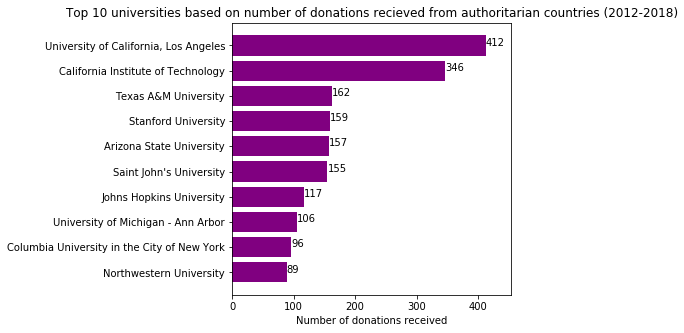

In [16]:
top10schools_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area
ax.barh(top10schools_by_counts.index, top10schools_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations received')
ax.set_title('Top 10 universities based on number of donations recieved from authoritarian countries (2012-2018)')
for i, v in enumerate(top10schools_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)


# Note: this is donated contract + cash gifts

### Top 10 schools based on total dollars of donations recived from authoritarian countries

In [17]:
top10schools_by_dollars = (
    authoritarian_df.groupby('Institution Name')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .head(10))
top10schools_by_dollars

Institution Name
Carnegie Mellon University               389662174
Georgetown University                    367377726
Northwestern University                  361757194
Texas A&M University                     284437639
Massachusetts Institute of Technology    218533960
Harvard University                       146026842
New York University                      136785623
University of Southern California        100818751
George Washington University              99571723
Cornell University                        80897485
Name: Foreign Gift Amount, dtype: int64

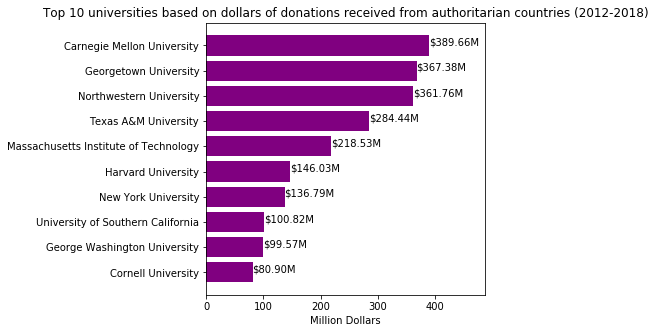

In [18]:
top10schools_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area
ax.barh(top10schools_by_dollars.index, top10schools_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million Dollars')
ax.set_title('Top 10 universities based on dollars of donations received from authoritarian countries (2012-2018)')
for i, v in enumerate(top10schools_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

### Top 10 schools based on total dollars of cash donations recived from authoritarian countries

In [19]:
top10schools_by_cash = (
    authoritarian_df.loc[authoritarian_df['Gift Type']=='Monetary Gift']
    .groupby('Institution Name')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .head(10))
top10schools_by_cash

Institution Name
Massachusetts Institute of Technology          190198291
Harvard University                              87979142
Stanford University                             75421948
New York University                             56297438
Johns Hopkins University                        53533107
Texas A&M University                            52364406
University of Pennsylvania                      35101067
Duke University                                 30564760
Yale University                                 24353520
Columbia University in the City of New York     21755763
Name: Foreign Gift Amount, dtype: int64

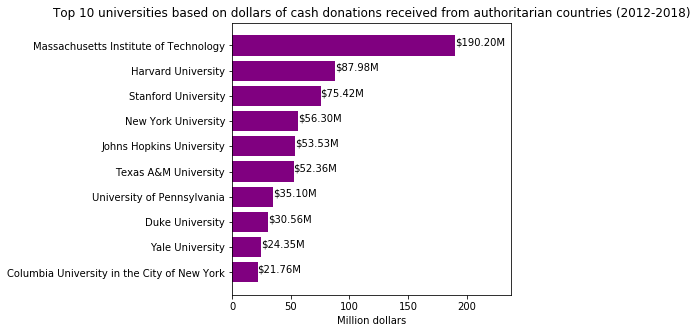

In [20]:
top10schools_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                   # Initializing pyplot area
ax.barh(top10schools_by_cash.index, top10schools_by_cash.values*(10**-6), color='purple')    # Generating bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Top 10 universities based on dollars of cash donations received from authoritarian countries (2012-2018)')
for i, v in enumerate(top10schools_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

## Identifying authoritarian countries making the most donations to US universities

### Top 10 authoritarian countries based on the number of donations made to US universities

In [21]:
top10countries_by_counts = (
    authoritarian_df.groupby('Country of Giftor')
    .count().iloc[:, 0]
    .sort_values(ascending=False)
    .head(10))

top10countries_by_counts

Country of Giftor
China                   1597
Saudi Arabia             719
Qatar                    444
United Arab Emirates     177
Kuwait                    83
Kazakhstan                54
Russia                    46
Vietnam                   43
Jordan                    22
Iraq                      18
Name: ID, dtype: int64

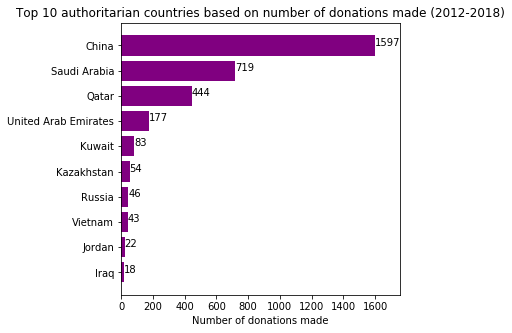

In [22]:
top10countries_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(top10countries_by_counts.index, top10countries_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Top 10 authoritarian countries based on number of donations made (2012-2018)')
for i, v in enumerate(top10countries_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

### Top 10 authoritarian countries based on total donation dollar amount

In [23]:
top10countries_by_dollars = (
    authoritarian_df.groupby('Country of Giftor')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .head(10))

top10countries_by_dollars

Country of Giftor
Qatar                   1478676069
China                    680273016
Saudi Arabia             649971586
United Arab Emirates     230945101
Russia                    99461804
Kuwait                    65782667
Kazakhstan                62179114
Iraq                      44276761
Vietnam                   11799413
Afghanistan                8891774
Name: Foreign Gift Amount, dtype: int64

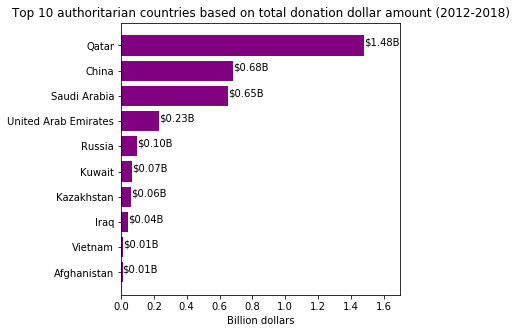

In [24]:
top10countries_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                   # Initializing pyplot area
ax.barh(top10countries_by_dollars.index, top10countries_by_dollars.values*(10**-9), color='purple')    # Generating bar chart
ax.set_xlabel('Billion dollars')
ax.set_title('Top 10 authoritarian countries based on total donation dollar amount (2012-2018)')
for i, v in enumerate(top10countries_by_dollars):
    ax.text(v*(10**-9), i,'\$'+str('{:.2f}'.format(v*(10**-9))+'B'), color='black')
plt.margins(x=0.15)

### Top 10 authoritarian countries based on total cash donation dollar amount

In [25]:
top10countries_by_cash = (
    authoritarian_df.loc[authoritarian_df['Gift Type']=='Monetary Gift']
    .groupby('Country of Giftor')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .head(10))

top10countries_by_cash

Country of Giftor
China                   323674776
Saudi Arabia            194561169
Russia                   95026310
Qatar                    74621261
United Arab Emirates     50152823
Kuwait                   45888708
Kazakhstan               36639149
Afghanistan               3890364
Burma                     2781683
Egypt                     2720885
Name: Foreign Gift Amount, dtype: int64

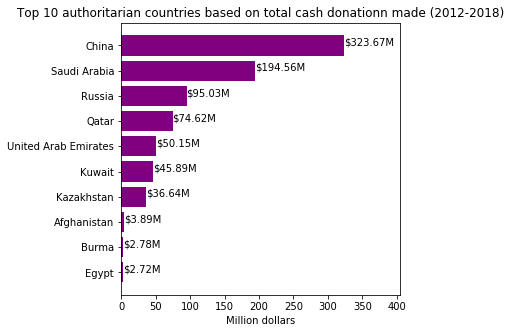

In [26]:
top10countries_by_cash.sort_values(inplace=True)

fig, ax = plt.subplots(figsize=(5,5))                                   # Initializing pyplot area
ax.barh(top10countries_by_cash.index, top10countries_by_cash.values*(10**-6), color='purple')    # Generating bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Top 10 authoritarian countries based on total cash donationn made (2012-2018)')
for i, v in enumerate(top10countries_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### Some quick observations:

* School receiving largest number of gifts from authoritarian countries: **University of California, Los Angeles** (UCLA)
* School receiving largest dollar amount of total gifts from authoritarian countries: **Carnegie Mellon University** (CMU)
* School receiving largest dollar amount of cash gifts from authoritarian countries: **Massachusetts Institute of Technology** (MIT)
* Authoritarian country donating the largest number of gifts: **China**
* Authoritarian country donating the largest dollar amount of total gifts: **Qatar**
* Authoritarian country donating the largest dollar amount of cash gifts: **China** (**Saudi Arabia** is 2<sup>nd</sup>)

## University of California, Los Angeles (UCLA)

UCLA recieved the most number of individual foreign donations (3,611) between 2012-2018. Out of those, 412 individual donations were from authoritarian countries (as defined by the Democracy Index), which made UCLA also the university recieving the most number of indivudual donations from authoritarian countries.

### Donation data from UCLA

In [73]:
UCLA_df = (
    merged_df.query('`Institution Name` == "University of California, Los Angeles"')   # Using pd.DataFrame.query
    .reset_index()                                                                     # Back quotes used to escape index
    .set_index(['Institution Name', 'Country of Giftor']))                             # labels with space

UCLA_df.head()

ID   OPEID  \
Institution Name                      Country of Giftor                  
University of California, Los Angeles Australia           1293  131500   
                                      Australia           5530  131500   
                                      Australia          12779  131500   
                                      Australia          13946  131500   
                                      Australia          14200  131500   

                                                                City State  \
Institution Name                      Country of Giftor                      
University of California, Los Angeles Australia          Los Angeles    CA   
                                      Australia          Los Angeles    CA   
                                      Australia          Los Angeles    CA   
                                      Australia          Los Angeles    CA   
                                      Australia          Los Angeles    CA   

                                                        Foreign Gift Received Date  \
Institution Name                      Country of Giftor                              
University of California, Los Angeles Australia                         2012-02-15   
                                      Australia                         2018-03-19   
                                      Australia                         2016-07-01   
                                      Australia                         2018-03-01   
                                      Australia                         2017-07-01   

                                                         Foreign Gift Amount  \
Institution Name                      Country of Giftor                        
University of California, Los Angeles Australia                      1255460   
                                      Australia                       313320   
                                      Australia                        21896   
                                      Australia                        10560   
                                      Australia                         9588   

                                                        Gift Type  \
Institution Name                      Country of Giftor             
University of California, Los Angeles Australia          Contract   
                                      Australia          Contract   
                                      Australia          Contract   
                                      Australia          Contract   
                                      Australia          Contract   

                                                                             Giftor Name  \
Institution Name                      Country of Giftor                                    
University of California, Los Angeles Australia                                      NaN   
                                      Australia          LOWY MEDICAL RESEARCH INSTITUTE   
                                      Australia                  UNIV OF NEW SOUTH WALES   
                                      Australia              Global Kinetics Corporation   
                                      Australia                   LOWY MEDICAL RESEARCH    

                                                        Country to merge on  \
Institution Name                      Country of Giftor                       
University of California, Los Angeles Australia                   Australia   
                                      Australia                   Australia   
                                      Australia                   Australia   
                                      Australia                   Australia   
                                      Australia                   Australia   

                                                         Rank  Score  \
Institution Name                      Country of Giftor                
Uni

#### List of foreign donations to UCLA grouped by countries

In [28]:
(UCLA_df.groupby('Country of Giftor')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False))

Country of Giftor
England                 892
Japan                   535
Canada                  495
China                   394
Hong Kong               290
Switzerland             197
Germany                 159
Taiwan                  121
France                  117
Australia                83
South Korea              73
Spain                    61
Israel                   60
Korea                    28
Singapore                19
The Netherlands          17
Saudi Arabia             13
Italy                    10
Norway                    7
Ireland                   6
South Africa              6
Brazil                    5
Greece                    4
Malaysia                  4
India                     3
Denmark                   3
United Arab Emirates      3
Bahamas                   2
Eritrea                   1
Ecuador                   1
Russia                    1
Ceylon                    1
Name: ID, dtype: int64

#### Total dollars donated to UCLA by each country

In [29]:
(UCLA_df.groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
England                 51186060
Japan                   23878716
Hong Kong               16606114
Switzerland             14286549
China                   13784326
Saudi Arabia            12032553
Germany                 11816638
France                   5884617
Canada                   5529592
Israel                   5334192
Korea                    4147817
Spain                    3532947
Taiwan                   3470583
Australia                2223854
The Netherlands          2068299
Ireland                  1887475
South Africa             1824427
South Korea              1715667
Denmark                  1072162
India                     990140
Russia                    673000
Greece                    539275
United Arab Emirates      453438
Singapore                 410505
Italy                     371846
Bahamas                   299983
Norway                    289839
Brazil                    276205
Malaysia                  250625
Ceylon                   

#### Total cash only donations made to UCLA by each country

In [74]:
(UCLA_df.loc[UCLA_df['Gift Type']=='Monetary Gift']
 .groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
England                 27045805
Hong Kong               11326545
Japan                    9526275
China                    5814723
Spain                    3329965
Taiwan                   3105107
Switzerland              1693504
Canada                   1368880
South Korea              1104869
The Netherlands           590691
Greece                    539275
France                    483368
Singapore                 410505
Korea                     369230
Germany                   304694
Norway                    289839
Brazil                    276205
Malaysia                  250625
Saudi Arabia              210620
Israel                    112939
Bahamas                    99983
Australia                  17785
Italy                       4425
Ireland                     1100
United Arab Emirates        1021
India                        140
South Africa                 121
Ceylon                       100
Ecuador                       21
Eritrea                  

#### List of donations made to UCLA by authoritarian countries

In [31]:
UCLA_by_counts = (
    UCLA_df.loc[UCLA_df['Regime type']=='Authoritarian']
    .groupby('Country of Giftor')
    .count()
    .iloc[:,0].sort_values(ascending=False))

UCLA_by_counts

Country of Giftor
China                   394
Saudi Arabia             13
United Arab Emirates      3
Russia                    1
Eritrea                   1
Name: ID, dtype: int64

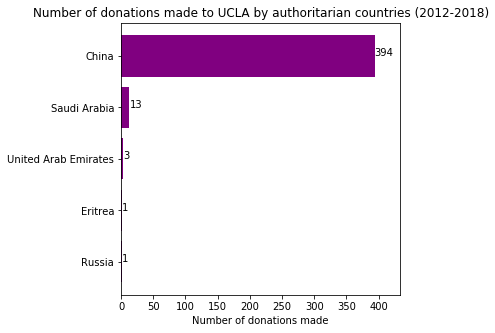

In [82]:
UCLA_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(UCLA_by_counts.index, UCLA_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made to UCLA by authoritarian countries (2012-2018)')
for i, v in enumerate(UCLA_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

#### Total donation dollars received by UCLA from authoritarian countries

In [78]:
UCLA_by_dollars = (
    UCLA_df.loc[UCLA_df['Regime type']=='Authoritarian']
    .groupby('Country of Giftor')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False))

UCLA_by_dollars

Country of Giftor
China                   13784326
Saudi Arabia            12032553
Russia                    673000
United Arab Emirates      453438
Eritrea                        3
Name: Foreign Gift Amount, dtype: int64

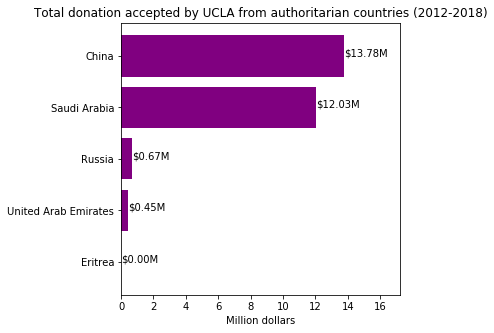

In [92]:
UCLA_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(UCLA_by_dollars.index, UCLA_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation accepted by UCLA from authoritarian countries (2012-2018)')
for i, v in enumerate(UCLA_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### Total cash donation accepted by UCLA from authoritarian countries

In [105]:
UCLA_by_cash = (
    UCLA_df.loc[(UCLA_df['Regime type']=='Authoritarian') & (UCLA_df['Gift Type']=='Monetary Gift')]
    .groupby('Country of Giftor')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False))

UCLA_by_cash

Country of Giftor
China                   5814723
Saudi Arabia             210620
United Arab Emirates       1021
Eritrea                       3
Name: Foreign Gift Amount, dtype: int64

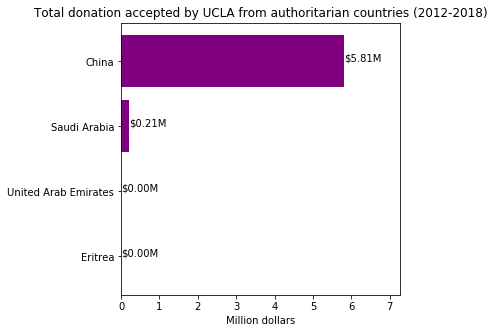

In [93]:
UCLA_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(UCLA_by_cash.index, UCLA_by_cash*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation accepted by UCLA from authoritarian countries (2012-2018)')
for i, v in enumerate(UCLA_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

## Carnegie Mellon University (CMU)

UCLA recieved the most donations in dollar amount from authoritarian countries in 2012-2018. These donations include contracts and cash. However, CMU was not within the top ten list of receiving the most individual donations from authoritarian countries. This implies that CMU accepted fewer donations from these countries, but each donations were of significantly higher dollar amount.

### Donation data from CMU

In [96]:
CMU_df = (
    merged_df.query('`Institution Name` == "Carnegie Mellon University"')   # Using pd.DataFrame.query
    .reset_index()                                                                     # Back quotes used to escape index
    .set_index(['Institution Name', 'Country of Giftor']))                             # labels with space

CMU_df.head()

ID   OPEID        City State  \
Institution Name           Country of Giftor                                   
Carnegie Mellon University Bermuda            5717  324200  Pittsburgh    PA   
                           Bermuda            5718  324200  Pittsburgh    PA   
                           Bermuda            5719  324200  Pittsburgh    PA   
                           Bermuda            5720  324200  Pittsburgh    PA   
                           Bermuda            5721  324200  Pittsburgh    PA   

                                             Foreign Gift Received Date  \
Institution Name           Country of Giftor                              
Carnegie Mellon University Bermuda                           2016-02-16   
                           Bermuda                           2016-02-16   
                           Bermuda                           2016-02-16   
                           Bermuda                           2016-02-16   
                           Bermuda                           2016-02-16   

                                              Foreign Gift Amount Gift Type  \
Institution Name           Country of Giftor                                  
Carnegie Mellon University Bermuda                       75000000  Contract   
                           Bermuda                       75000000  Contract   
                           Bermuda                       75000000  Contract   
                           Bermuda                       75000000  Contract   
                           Bermuda                       75000000  Contract   

                                             Giftor Name Country to merge on  \
Institution Name           Country of Giftor                                   
Carnegie Mellon University Bermuda                   NaN      United Kingdom   
                           Bermuda                   NaN      United Kingdom   
                           Bermuda                   NaN      United Kingdom   
                           Bermuda                   NaN      United Kingdom   
                           Bermuda                   NaN      United Kingdom   

                                              Rank  Score  \
Institution Name           Country of Giftor                
Carnegie Mellon University Bermuda            14.0   8.52   
                           Bermuda            14.0   8.52   
                           Bermuda            14.0   8.52   
                           Bermuda            14.0   8.52   
                           Bermuda            14.0   8.52   

                                              Electoral process and pluralism  \
Institution Name           Country of Giftor                                    
Carnegie Mellon University Bermuda                                       9.58   
                           Bermuda                                       9.58   
                           Bermuda                                       9.58   
                           Bermuda                                       9.58   
                           Bermuda                                       9.58   

                                              Functioning of government  \
Institution Name           Country of Giftor                              
Carnegie Mellon University Bermuda                                  7.5   
                           Bermuda                                  7.5   
                           Bermuda                                  7.5   
                           Bermuda                                  7.5   
                           Bermuda                                  7.5   

                                              Political participation  \
Institution Name           Country of Giftor                            
Carnegie Mellon University Bermuda                               8.89   
                           Bermuda                               8.89   
                           Bermu

#### List of foreign donations to CMU grouped by countries

In [97]:
(CMU_df.groupby('Country of Giftor')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False))

Country of Giftor
Japan                   25
Qatar                   22
South Korea             19
India                   16
Bermuda                 10
England                  8
Switzerland              7
Taiwan                   6
China                    6
The Netherlands          4
Portugal                 4
Russia                   4
France                   3
Colombia                 3
South Africa             3
Canada                   3
Hong Kong                3
Chile                    2
Singapore                2
Germany                  2
Czech Republic           1
British West Indies      1
United Arab Emirates     1
Italy                    1
Korea                    1
Norway                   1
Rwanda                   1
Saudi Arabia             1
Sweden                   1
Thailand                 1
Mexico                   1
Name: ID, dtype: int64

#### Total dollars donated to CMU by each country

In [98]:
(CMU_df.groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
Bermuda                 750000000
Qatar                   376325840
Thailand                 67700000
Portugal                 37492100
India                    29399473
Japan                    21851301
Canada                   11937151
Hong Kong                11250000
South Korea               9822307
Taiwan                    8150000
Switzerland               8093900
South Africa              7940779
United Arab Emirates      5000000
England                   4290688
Singapore                 4165000
China                     4146500
Colombia                  3792101
Russia                    2860500
Germany                   2795576
Chile                     2583435
The Netherlands           2383856
France                    1088287
Saudi Arabia              1050000
Korea                      964000
Italy                      720000
Sweden                     617566
Norway                     383990
Czech Republic             317520
Mexico                     307

#### Total cash only donations made to CMU by each country

In [99]:
(CMU_df.loc[CMU_df['Gift Type']=='Monetary Gift']
 .groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
India             16650000
Canada            11687151
Qatar              5456800
Switzerland        4800000
Japan              3637243
China              2500000
England            2029602
Hong Kong          1250000
Czech Republic      317520
Rwanda              279334
Name: Foreign Gift Amount, dtype: int64

(t_stat, p_value, f'Different={p_value<0.01}')

In [100]:
CMU_by_counts = (
    CMU_df.loc[CMU_df['Regime type']=='Authoritarian']
    .groupby('Country of Giftor')
    .count()
    .iloc[:,0].sort_values(ascending=False))

CMU_by_countsy_counts

Country of Giftor
Qatar                   22
China                    6
Russia                   4
United Arab Emirates     1
Saudi Arabia             1
Rwanda                   1
Name: ID, dtype: int64

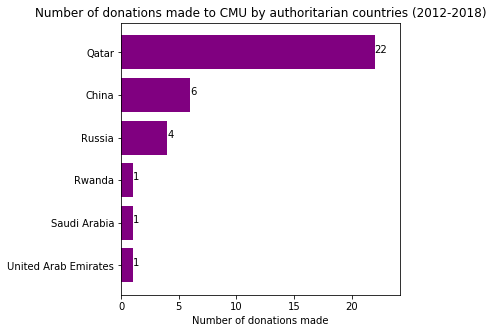

In [102]:
CMU_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(CMU_by_counts.index, CMU_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made to CMU by authoritarian countries (2012-2018)')
for i, v in enumerate(CMU_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

#### Total donation dollars received by CMU from authoritarian countries

In [108]:
CMU_by_dollars = (
    CMU_df.loc[CMU_df['Regime type']=='Authoritarian']
    .groupby('Country of Giftor')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False))

CMU_by_dollars

Country of Giftor
Qatar                   376325840
United Arab Emirates      5000000
China                     4146500
Russia                    2860500
Saudi Arabia              1050000
Rwanda                     279334
Name: Foreign Gift Amount, dtype: int64

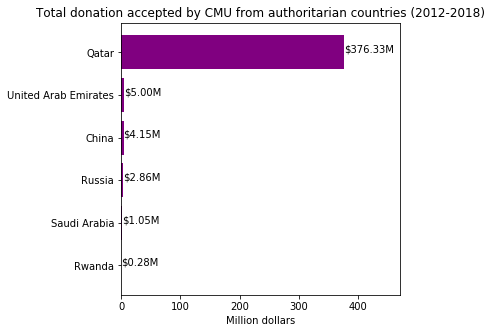

In [109]:
CMU_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(CMU_by_dollars.index, CMU_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation accepted by CMU from authoritarian countries (2012-2018)')
for i, v in enumerate(CMU_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### Total cash donation accepted by CMU from authoritarian countries

In [107]:
CMU_by_cash = (
    CMU_df.loc[(CMU_df['Regime type']=='Authoritarian') & (CMU_df['Gift Type']=='Monetary Gift')]
    .groupby('Country of Giftor')
    .sum().loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False))

CMU_by_cash

Country of Giftor
Qatar     5456800
China     2500000
Rwanda     279334
Name: Foreign Gift Amount, dtype: int64

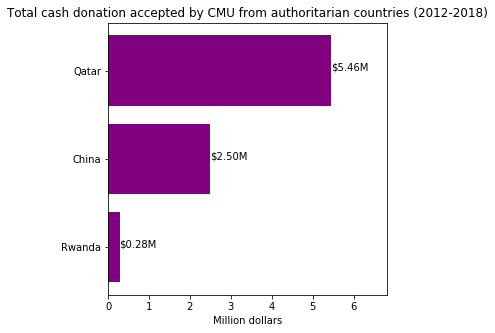

In [111]:
CMU_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(CMU_by_cash.index, CMU_by_cash.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation accepted by CMU from authoritarian countries (2012-2018)')
for i, v in enumerate(CMU_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

## Massachusetts Institute of Technology (MIT)

If only cash donations were being measured, then MIT received the most cash donations from authoritarian countries. Without a full analysis we can't be sure, but we can see from CMU that often foreign countries would make a massive donation in the form of a contract. These type of donations generally were much higher in dolalr value than purely cash donations.

#### List of foreign donations to MIT grouped by countries

In [113]:
(MIT_df.groupby('Country of Giftor')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False))

Country of Giftor
Hong Kong               54
Singapore               31
England                 28
China                   22
Japan                   22
Mexico                  20
India                   18
Switzerland             17
Canada                  15
Taiwan                  14
Saudi Arabia            13
South Korea             13
Brazil                  12
Kuwait                  12
United Arab Emirates    10
Russia                  10
Malaysia                10
France                  10
Denmark                  9
Spain                    8
Greece                   7
Portugal                 7
Italy                    6
New Zealand              4
Peru                     4
Colombia                 4
Argentina                4
Liechtenstein            3
Jersey                   3
Korea                    3
Bermuda                  3
Chile                    3
Hungary                  2
Mauritius                2
Morocco                  2
The Netherlands          2
Cayman Isl

#### Total dollars donated to MIT by each country

In [114]:
(MIT_df.groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
Russia                  83358344
Saudi Arabia            83100000
England                 65960984
Singapore               51884569
Hong Kong               51736247
India                   42928600
China                   31472548
Taiwan                  29000000
Mexico                  28010000
Japan                   19360214
Canada                  17246092
Morocco                 17060000
Jersey                  16882533
Denmark                 15654056
Malaysia                14205624
Kuwait                  10817343
South Korea             10540320
United Arab Emirates     9535725
Switzerland              7249233
Brazil                   6440000
Greece                   6250080
Spain                    5076489
Portugal                 4931262
Bermuda                  4000000
Italy                    3452500
Peru                     3250000
Liechtenstein            3000000
France                   2605685
Colombia                 2250000
Thailand                 

#### Total cash donated to MIT by each country

In [115]:
(MIT_df.loc[MIT_df['Gift Type']=='Monetary Gift']
 .groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

Country of Giftor
Saudi Arabia            83100000
Russia                  82850000
England                 65350645
Hong Kong               51486247
Singapore               49251000
India                   41750000
Taiwan                  28500000
Mexico                  28010000
Canada                  17246092
Jersey                  16882533
Malaysia                14205624
Japan                   13150000
Kuwait                  10817343
China                    8375548
Denmark                  7754056
Switzerland              6549233
Brazil                   6440000
Greece                   6250080
Spain                    5076489
Portugal                 4931262
United Arab Emirates     4805400
Bermuda                  4000000
Peru                     3250000
Liechtenstein            3000000
Italy                    2650000
Colombia                 2250000
Thailand                 2000000
Argentina                1925000
France                   1886880
Korea                    

#### List of donations made to MIT by authoritarian countries

In [116]:
MIT_by_counts = (MIT_df.loc[MIT_df['Regime type']=='Authoritarian']
 .groupby('Country of Giftor')
 .count()
 .iloc[:,0].sort_values(ascending=False))

MIT_by_counts

Country of Giftor
China                   22
Saudi Arabia            13
Kuwait                  12
United Arab Emirates    10
Russia                  10
Jordan                   1
Name: ID, dtype: int64

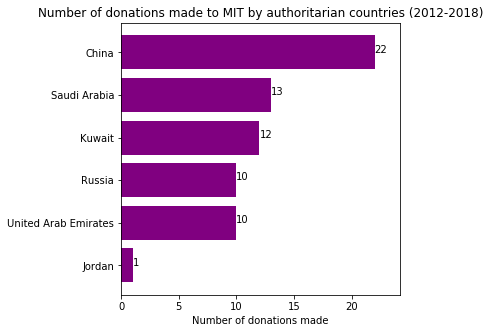

In [117]:
MIT_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(MIT_by_counts.index, MIT_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made to MIT by authoritarian countries (2012-2018)')
for i, v in enumerate(MIT_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)


#### Total donation dollars received by MIT from authoritarian countries

In [119]:
MIT_by_dollars = (MIT_df.loc[MIT_df['Regime type']=='Authoritarian']
 .groupby('Country of Giftor')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

MIT_by_dollars

Country of Giftor
Russia                  83358344
Saudi Arabia            83100000
China                   31472548
Kuwait                  10817343
United Arab Emirates     9535725
Jordan                    250000
Name: Foreign Gift Amount, dtype: int64

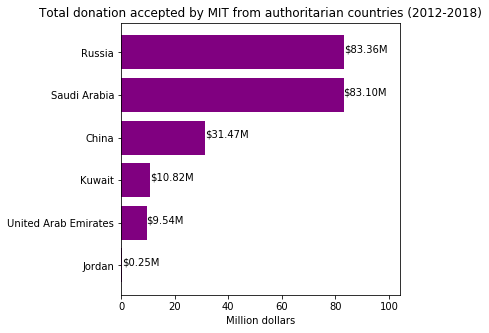

In [120]:
MIT_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(MIT_by_dollars.index, MIT_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation accepted by MIT from authoritarian countries (2012-2018)')
for i, v in enumerate(MIT_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### Total cash donation accepted by MIT from authoritarian countries

In [121]:
MIT_by_cash = (MIT_df.loc[(MIT_df['Regime type']=='Authoritarian') & (MIT_df['Gift Type']=='Monetary Gift')]
 .groupby('Country of Giftor')
 .sum().loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False))

MIT_by_cash

Country of Giftor
Saudi Arabia            83100000
Russia                  82850000
Kuwait                  10817343
China                    8375548
United Arab Emirates     4805400
Jordan                    250000
Name: Foreign Gift Amount, dtype: int64

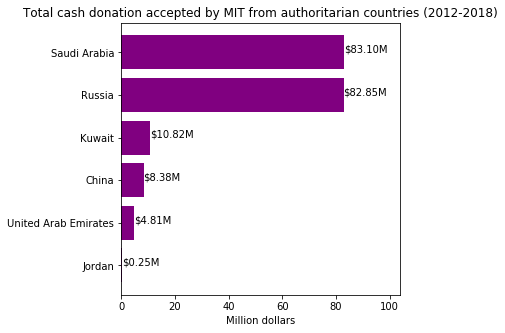

In [122]:
MIT_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(MIT_by_cash.index, MIT_by_cash.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation accepted by MIT from authoritarian countries (2012-2018)')
for i, v in enumerate(MIT_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

### People's Republic of China

China was ranked as the authoritarian country that made the most number of individual donations and also the hightest amount of total cash donations between 2012 to 2018.

#### List of donations made by China to US universities

In [123]:
china_df = authoritarian_df.loc['China'].copy()
china_df.head()

,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Giftor Name,Country to merge on,Rank,Score,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,Regime type,Region
Institution Name,,,,,,,,,,,,,,,,,,
Amherst College,6255,211500,Amherst,MA,2017-11-03,278723,Monetary Gift,Wei Sun Christianson,China,153.0,2.26,0.0,4.29,3.33,2.5,1.18,Authoritarian,Asia & Australasia
Arizona State University,52,108100,Tempe,AZ,2013-12-13,15000,Contract,Confucius Institute,China,153.0,2.26,0.0,4.29,3.33,2.5,1.18,Authoritarian,Asia & Australasia
Arizona State University,59,108100,Tempe,AZ,2014-05-07,17500,Contract,Shanghai Advanced Instit of Finance,China,153.0,2.26,0.0,4.29,3.33,2.5,1.18,Authoritarian,Asia & Australasia
Arizona State University,89,108100,Tempe,AZ,2017-06-02,31640,Contract,SAIF@Shanghai Jiaotong University,China,153.0,2.26,0.0,4.29,3.33,2.5,1.18,Authoritarian,Asia & Australasia
Arizona State University,90,108100,Tempe,AZ,2017-06-02,31640,Contract,SAIF@Shanghai Jiaotong University,China,153.0,2.26,0.0,4.29,3.33,2.5,1.18,Authoritarian,Asia & Australasia


#### The 10 US universitites China donated to the most number of times

In [124]:
china_by_counts = (china_df.groupby('Institution Name')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False)
 .head(10))

china_by_counts

Institution Name
University of California, Los Angeles          394
California Institute of Technology             173
Stanford University                            124
University of Michigan - Ann Arbor              77
Columbia University in the City of New York     60
University of Pennsylvania                      51
Arizona State University                        45
University of Southern California               36
Bryant University                               34
New York University                             34
Name: ID, dtype: int64

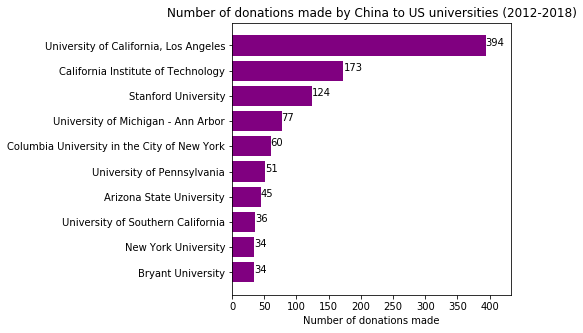

In [125]:
china_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(china_by_counts.index, china_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made by China to US universities (2012-2018)')
for i, v in enumerate(china_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

#### The 10 US universitites China donated most amount of total dollars

In [126]:
china_by_dollars = (china_df.groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

china_by_dollars

Institution Name
Harvard University                            79272834
University of Southern California             64842308
Stanford University                           57826822
New York University                           47921981
University of Illinois at Urbana-Champaign    33531022
University of Pennsylvania                    32919192
Massachusetts Institute of Technology         31472548
Arizona State University                      31332013
University of Michigan - Ann Arbor            23988361
University of California, Berkeley            23044226
Name: Foreign Gift Amount, dtype: int64

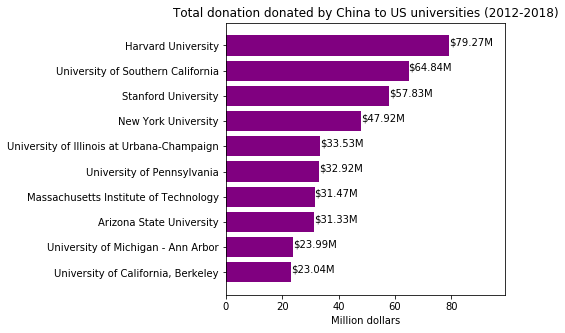

In [134]:
china_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(china_by_dollars.index, china_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation donated by China to US universities (2012-2018)')
for i, v in enumerate(china_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### The 10 US universitites China donated most amount of total cash

In [143]:
china_by_cash = (china_df.loc[china_df['Gift Type']=='Monetary Gift']
 .groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

china_by_cash

Institution Name
Harvard University                             61995597
Stanford University                            54251885
New York University                            40972465
University of Pennsylvania                     32666792
Yale University                                21832445
Columbia University in the City of New York    16930952
University of Southern California              12551262
Princeton University                            9608438
Massachusetts Institute of Technology           8375548
Johns Hopkins University                        7058037
Name: Foreign Gift Amount, dtype: int64

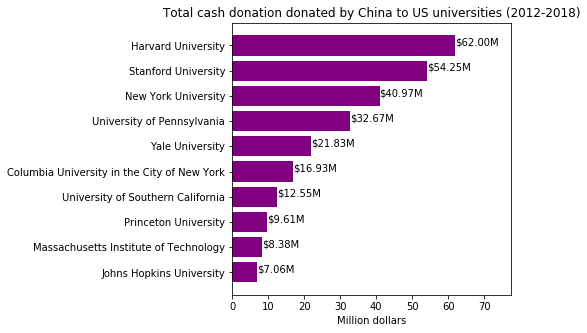

In [135]:
china_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(china_by_cash.index, china_by_cash.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation donated by China to US universities (2012-2018)')
for i, v in enumerate(china_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

### State of Qatar

Qatar was ranked as the authoritarian country that made the highest total dollar amount of donations to US universities between 2012 to 2018. This was primarily due to the large contract-based donations Qatar made, as China was the authoritarian country that made the highest cash donations, followed by Saudi Arabia.

#### List of donations made by Qatar to US universities

In [137]:
qatar_df = authoritarian_df.loc['Qatar'].copy()
qatar_df.head()

,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Giftor Name,Country to merge on,Rank,Score,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,Regime type,Region
Institution Name,,,,,,,,,,,,,,,,,,
Arizona State University,13,108100,Tempe,AZ,2015-11-12,2580,Contract,RasGas Company Limited,Qatar,128.0,3.19,0.0,4.29,2.22,5.63,3.82,Authoritarian,Middle East & North Africa
Arizona State University,14,108100,Tempe,AZ,2016-09-06,5310,Contract,Sidra Medical and Research Center,Qatar,128.0,3.19,0.0,4.29,2.22,5.63,3.82,Authoritarian,Middle East & North Africa
Arizona State University,32,108100,Tempe,AZ,2014-03-26,11609,Contract,RasGas Company Limited,Qatar,128.0,3.19,0.0,4.29,2.22,5.63,3.82,Authoritarian,Middle East & North Africa
Arizona State University,51,108100,Tempe,AZ,2016-01-27,14525,Contract,Qatar Airways,Qatar,128.0,3.19,0.0,4.29,2.22,5.63,3.82,Authoritarian,Middle East & North Africa
Arizona State University,7732,108100,Tempe,AZ,2014-12-11,192918,Contract,RasGas Company Limited,Qatar,128.0,3.19,0.0,4.29,2.22,5.63,3.82,Authoritarian,Middle East & North Africa


#### The 10 US universitites Qatar donated to the most number of times

In [139]:
qatar_by_counts = (qatar_df.groupby('Institution Name')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False)
 .head(10))

qatar_by_counts

Institution Name
Texas A&M University                  158
Cornell University                     75
Northwestern University                56
Arizona State University               40
Georgetown University                  24
Carnegie Mellon University             22
University of Michigan - Ann Arbor     13
Purdue University                       7
Virginia Commonwealth University        7
Harvard University                      6
Name: ID, dtype: int64

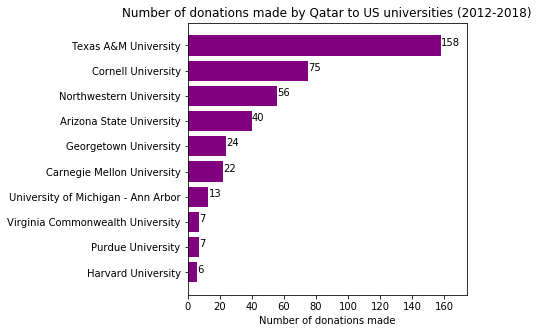

In [140]:
qatar_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(qatar_by_counts.index, qatar_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made by Qatar to US universities (2012-2018)')
for i, v in enumerate(qatar_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)


#### The 10 US universitites Qatar donated most amount of total dollars

In [141]:
qatar_by_dollars = (qatar_df.groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

qatar_by_dollars

Institution Name
Carnegie Mellon University            376325840
Georgetown University                 350874324
Northwestern University               340244432
Texas A&M University                  274710107
Cornell University                     65780453
Virginia Commonwealth University       40668808
University of Michigan - Ann Arbor      7860694
Harvard University                      7077754
Arizona State University                2515184
Purdue University                       2112466
Name: Foreign Gift Amount, dtype: int64

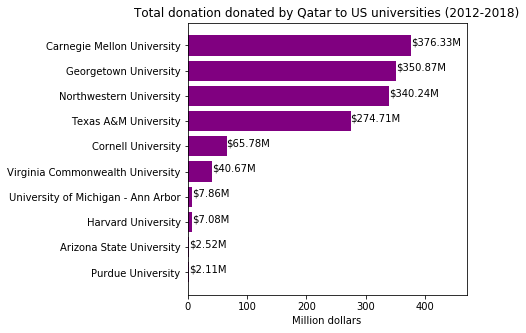

In [142]:
qatar_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(qatar_by_dollars.index, qatar_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation donated by Qatar to US universities (2012-2018)')
for i, v in enumerate(qatar_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### The 10 US universitites Qatar donated most amount of total cash

In [144]:
qatar_by_cash = (qatar_df.loc[qatar_df['Gift Type']=='Monetary Gift']
 .groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

qatar_by_cash

Institution Name
Texas A&M University                   51937476
Carnegie Mellon University              5456800
Cornell University                      4428979
Harvard University                      3999978
Georgetown University                   2265000
Purdue University                       2112466
Johns Hopkins University                1501279
Northwestern University                 1029952
DePaul University                        476485
Pennsylvania State University (The)      450906
Name: Foreign Gift Amount, dtype: int64

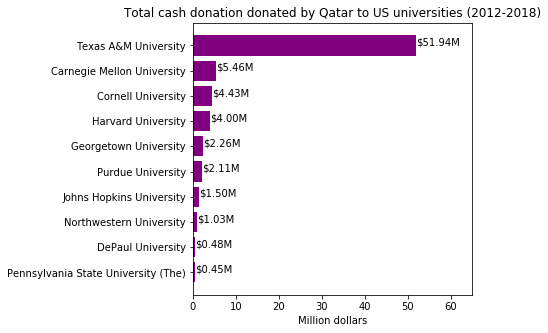

In [145]:
qatar_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(qatar_by_cash.index, qatar_by_cash.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation donated by Qatar to US universities (2012-2018)')
for i, v in enumerate(qatar_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

### Kingdom of Saudi Arabia

Saudi Arabia only ranked as the 2nd authoritarian country that donated the most amount of cash to US university, as China was ranked the 1st. We have shown analyses of China above, below is of Saudi Arabia.

#### List of donations made by Saudi Arabia to US universities

In [147]:
saudi_df = authoritarian_df.loc['Saudi Arabia'].copy()
saudi_df.head()

,ID,OPEID,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Giftor Name,Country to merge on,Rank,Score,Electoral process and pluralism,Functioning of government,Political participation,Political culture,Civil liberties,Regime type,Region
Institution Name,,,,,,,,,,,,,,,,,,
Arizona State University,4030,108100,Tempe,AZ,2015-12-07,445000,Contract,Saudi Basic Industries Corp (SABIC),Saudi Arabia,159.0,1.93,0.0,2.86,2.22,3.13,1.47,Authoritarian,Middle East & North Africa
Arizona State University,7313,108100,Tempe,AZ,2017-09-08,224357,Contract,King Abdulaziz City for Sci & Tech,Saudi Arabia,159.0,1.93,0.0,2.86,2.22,3.13,1.47,Authoritarian,Middle East & North Africa
Arizona State University,7436,108100,Tempe,AZ,2014-08-22,210339,Contract,Aramco,Saudi Arabia,159.0,1.93,0.0,2.86,2.22,3.13,1.47,Authoritarian,Middle East & North Africa
Arizona State University,7501,108100,Tempe,AZ,2014-04-21,202538,Contract,Aramco,Saudi Arabia,159.0,1.93,0.0,2.86,2.22,3.13,1.47,Authoritarian,Middle East & North Africa
Arizona State University,7798,108100,Tempe,AZ,2014-04-23,187497,Contract,Aramco,Saudi Arabia,159.0,1.93,0.0,2.86,2.22,3.13,1.47,Authoritarian,Middle East & North Africa


#### The 10 US universitites Saudi Arabia donated to the most number of times

In [149]:
saudi_by_counts = (saudi_df.groupby('Institution Name')
 .count()
 .iloc[:,0]
 .sort_values(ascending=False)
 .head(10))

saudi_by_counts

Institution Name
California Institute of Technology    166
Saint John's University               142
University of Kansas                   37
Johns Hopkins University               29
Babson College                         26
Stanford University                    24
Georgia Institute of Technology        20
University of Southern California      16
George Washington University           16
Tufts University                       15
Name: ID, dtype: int64

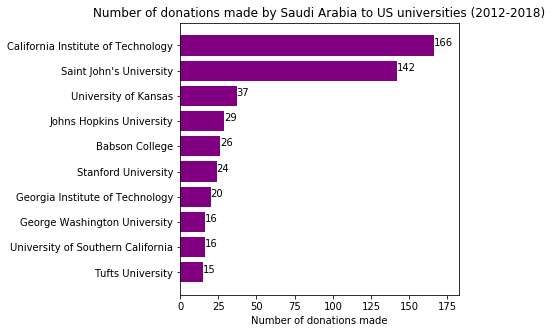

In [151]:
saudi_by_counts.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(saudi_by_counts.index, saudi_by_counts.values, color='purple')    # Generate basic bar chart
ax.set_xlabel('Number of donations made')
ax.set_title('Number of donations made by Saudi Arabia to US universities (2012-2018)')
for i, v in enumerate(saudi_by_counts.values):           # Add numeric labels to bars for clarity
     ax.text(v, i, str(v), color='black')
plt.margins(x=0.1)

#### The 10 US universitites Saudi Arabia donated most amount of total dollars

In [152]:
saudi_by_dollars = (saudi_df.groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

saudi_by_dollars

Institution Name
Massachusetts Institute of Technology    83100000
George Washington University             75181430
George Mason University                  58926776
Tufts University                         37896715
Johns Hopkins University                 32618021
Harvard University                       30637202
University of Kansas                     29898072
University of Southern California        25343601
University of California, Berkeley       24143617
Eastern Washington University            24056612
Name: Foreign Gift Amount, dtype: int64

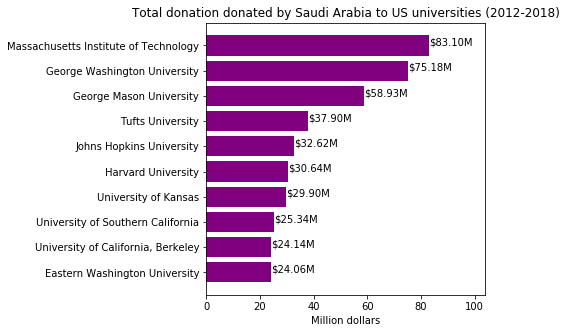

In [153]:
saudi_by_dollars.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(saudi_by_dollars.index, saudi_by_dollars.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total donation donated by Saudi Arabia to US universities (2012-2018)')
for i, v in enumerate(saudi_by_dollars):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### The 10 US universitites Saudi Arabia donated most amount of total cash

In [154]:
saudi_by_cash = (saudi_df.loc[saudi_df['Gift Type']=='Monetary Gift']
 .groupby('Institution Name')
 .sum()
 .loc[:, 'Foreign Gift Amount']
 .sort_values(ascending=False)
 .head(10))

saudi_by_cash

Institution Name
Massachusetts Institute of Technology          83100000
Johns Hopkins University                       32618021
Stanford University                            17520063
New York Institute of Technology               13868962
University of Kansas                            6448595
MCPHS University                                6329640
Georgetown University                           6000000
Georgia Institute of Technology                 5696753
Oregon State University                         5359320
Columbia University in the City of New York     4499841
Name: Foreign Gift Amount, dtype: int64

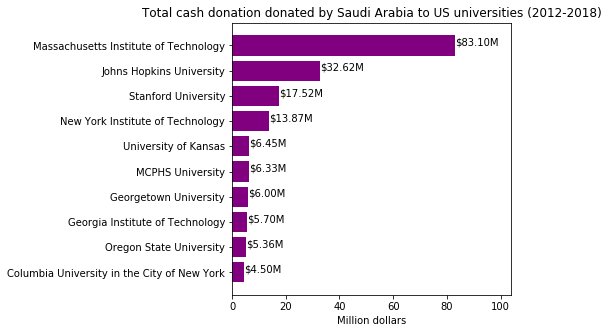

In [156]:
saudi_by_cash.sort_values(inplace=True)
fig, ax = plt.subplots(figsize=(5,5))                                 # Begin pyplot area

ax.barh(saudi_by_cash.index, saudi_by_cash.values*(10**-6), color='purple')    # Generate basic bar chart
ax.set_xlabel('Million dollars')
ax.set_title('Total cash donation donated by Saudi Arabia to US universities (2012-2018)')
for i, v in enumerate(saudi_by_cash):
    ax.text(v*(10**-6), i,'\$'+str('{:.2f}'.format(v*(10**-6))+'M'), color='black')
plt.margins(x=0.25)

#### Summary foreign donation information

Below are the summary foreign donation information of the top 50 US universities sorted by number of individual foreign donations recieved

In [159]:
most_number = (
    merged_df.groupby('Institution Name')
    .count()
    .iloc[:, 0]
    .sort_values(ascending=False)
    .copy())

most_dollars = (
    merged_df.groupby('Institution Name')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .copy())

most_cash = (
    merged_df.loc[merged_df['Gift Type']=='Monetary Gift']
    .groupby('Institution Name')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .copy())

simplified_schools = pd.DataFrame(most_number).rename({'ID': 'Number of donations received'}, axis=1)
simplified_schools.loc[:, 'Total dollars received (including contracts)'] = most_dollars
simplified_schools.loc[:, 'Total cash received'] = most_cash

simplified_schools.head(50)

,Number of donations received,Total dollars received (including contracts),Total cash received
Institution Name,,,
"University of California, Los Angeles",3611,186837568,68278363.0
California Institute of Technology,3364,119194892,46329743.0
Johns Hopkins University,1181,447459034,447443471.0
Columbia University in the City of New York,828,236090683,146003397.0
Ohio State University (The),795,46384434,9127161.0
University of Michigan - Ann Arbor,702,282725943,41693490.0
Stanford University,659,313775195,305730258.0
Harvard University,564,1143899998,729378154.0
Massachusetts Institute of Technology,415,660830374,582888432.0


Below are the summary foreign donation information of the top 50 countries sorted by number of individual donations made

In [166]:
most_number_c = (
    merged_df.groupby('Country of Giftor')
    .count()
    .iloc[:, 0]
    .sort_values(ascending=False)
    .copy())

most_dollars_c = (
    merged_df.groupby('Country of Giftor')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .copy())

most_cash_c = (
    merged_df.loc[merged_df['Gift Type']=='Monetary Gift']
    .groupby('Country of Giftor')
    .sum()
    .loc[:, 'Foreign Gift Amount']
    .sort_values(ascending=False)
    .copy())

simplified_countries = pd.DataFrame(most_number_c).rename({'ID': 'Number of donations received'}, axis=1)
simplified_countries.loc[:, 'Total dollars received (including contracts)'] = most_dollars_c
simplified_countries.loc[:, 'Total cash received'] = most_cash_c
simplified_countries.columns = ['Number of donations given', 'Total dollars given', 'Total cash given']

simplified_countries.head(50)

,Number of donations given,Total dollars given,Total cash given
Country of Giftor,,,
England,2774,936468499,544642697.0
Canada,2076,511016461,254234892.0
Japan,1757,447932424,174662195.0
China,1597,680273016,323674776.0
France,1321,367445405,162727154.0
Switzerland,1303,421080365,182383835.0
Germany,1136,237677300,83686491.0
Hong Kong,806,583104614,531604426.0
Saudi Arabia,719,649971586,194561169.0


#### Statistical analyses

Here we consider the correlation (via Pearson's correlation coefficient) between the number of donation recieved, total dollars received, and total cash received by each school.

In [167]:
simplified_schools.corr()

,Number of donations received,Total dollars received (including contracts),Total cash received
Number of donations received,1.000000,0.258418,0.255110
Total dollars received (including contracts),0.258418,1.000000,0.697038
Total cash received,0.255110,0.697038,1.000000


Text(0.5, 1.0, 'Correlation graph between number of donations received and total dollars received by each US university')

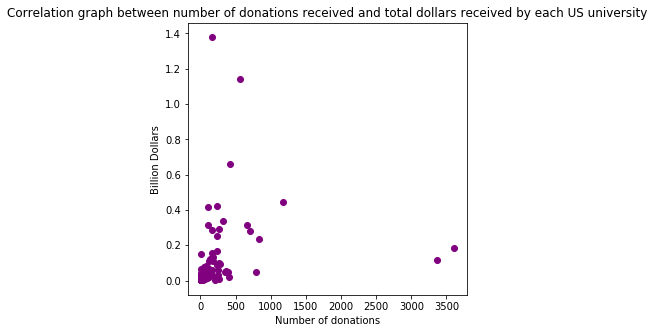

In [164]:
fig, ax = plt.subplots(figsize=(5,5))                                  
ax.scatter(
    simplified_schools.loc[:, 'Number of donations received'], 
    simplified_schools.loc[:, 'Total dollars received (including contracts)']*(10**-9),
    color='purple',
)
ax.set_xlabel('Number of donations')
ax.set_ylabel('Billion Dollars')
ax.set_title('Correlation graph between number of donations received and total dollars received by each US university')

Based on the Pearson's correlation coefficient and visual observation of the correlation graph, there is little correlation between the number of donations received by a university and the total dollar amount it received.

Here we consider the correlation (via Pearson's correlation coefficient) between the number of donation made, total dollars donated, and total cash donated by each country.

In [168]:
simplified_countries.corr()

,Number of donations given,Total dollars given,Total cash given
Number of donations given,1.000000,0.689003,0.826233
Total dollars given,0.689003,1.000000,0.724197
Total cash given,0.826233,0.724197,1.000000


Text(0.5, 1.0, 'Correlation graph between number of donations given and total dollars given by each country')

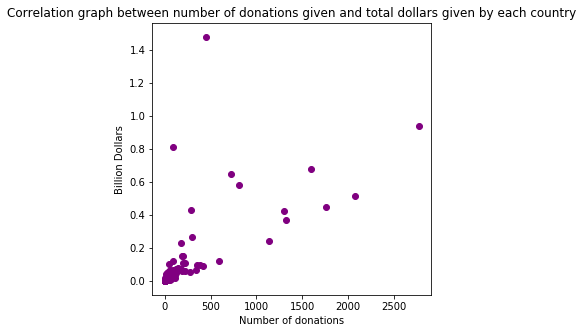

In [173]:
fig, ax = plt.subplots(figsize=(5,5))                                  
ax.scatter(
    simplified_countries.loc[:, 'Number of donations given'], 
    simplified_countries.loc[:, 'Total dollars given']*(10**-9),
    color='purple')
ax.set_xlabel('Number of donations')
ax.set_ylabel('Billion Dollars')
ax.set_title('Correlation graph between number of donations given and total dollars given by each country')

The correlation between number of donations given by each countries and the total dollar amount (including contracts) it gave is relatively strong, according to Pearson's correlation coefficient and visual observation of the correlation graph.